In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2019 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Upper Air Analysis using Declarative Syntax

The MetPy declarative syntax allows for a simplified interface to creating common
meteorological analyses including upper air observation plots.

In [3]:
from datetime import datetime

import pandas as pd

from metpy.cbook import get_test_data
import metpy.plots as mpplots
from metpy.units import units

**Getting the data**

In this example, data is originally from the Iowa State Upper-air archive
(https://mesonet.agron.iastate.edu/archive/raob/) available through a Siphon method.
The data are pre-processed to attach latitude/longitude locations for each RAOB site.

In [4]:
data = pd.read_csv(get_test_data('UPA_obs.csv', as_file_obj=False))

# In a real-world case, you could obtain and preprocess the data with code such as
# from siphon.simplewebservice.iastate import IAStateUpperAir
# from metpy.io import add_station_lat_lon

# data = IAStateUpperAir().request_all_data(datetime(2021, 8, 25, 12))
# data = add_station_lat_lon(data)

**Plotting the data**

Use the declarative plotting interface to create a CONUS upper-air map for 500 hPa

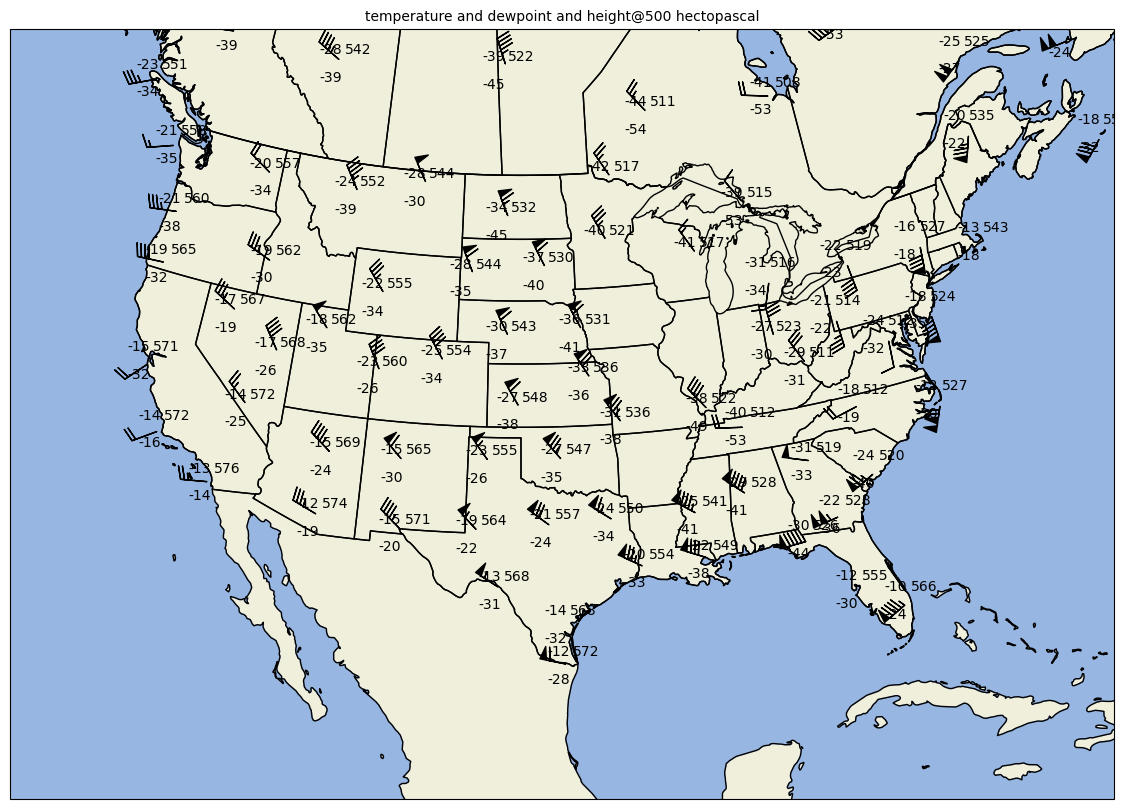

In [5]:
# Plotting the Observations
obs = mpplots.PlotObs()
obs.data = data
obs.time = datetime(1993, 3, 14, 0)
obs.level = 500 * units.hPa
obs.fields = ['temperature', 'dewpoint', 'height']
obs.locations = ['NW', 'SW', 'NE']
obs.formats = [None, None, lambda v: format(v, '.0f')[:3]]
obs.vector_field = ('u_wind', 'v_wind')
obs.reduce_points = 0

# Add map features for the particular panel
panel = mpplots.MapPanel()
panel.layout = (1, 1, 1)
panel.area = (-124, -72, 20, 53)
panel.projection = 'lcc'
panel.layers = ['coastline', 'borders', 'states', 'land', 'ocean']
panel.plots = [obs]

# Collecting panels for complete figure
pc = mpplots.PanelContainer()
pc.size = (15, 10)
pc.panels = [panel]

# Showing the results
pc.show()